<a href="https://colab.research.google.com/github/BharathraajNagarajan/AI_Insights_Engine/blob/main/ML_PROJECT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install torch torchvision numpy matplotlib scipy


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 28.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 8.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 17.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 211.5/211.5 MB 4.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [5]:
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from math import sqrt

In [12]:
from google.colab import files
uploaded = files.upload()


Saving mnist_all.mat to mnist_all.mat


In [13]:
# --------------------------------------
# Function 1: Sigmoid Activation
# --------------------------------------
def sigmoid(z):
    """Computes the sigmoid function."""
    return 1 / (1 + np.exp(-z))

# --------------------------------------
# Function 2: Preprocessing MNIST Data
# --------------------------------------
def preprocess():
    """Loads, normalizes, and splits MNIST dataset into train, validation, and test sets."""
    mat = loadmat('mnist_all.mat')  # Load dataset

    # Extract data and labels
    train_data, train_label = [], []
    test_data, test_label = [], []

    for i in range(10):
        train_data.append(mat[f'train{i}'])  # Train images
        train_label.append(np.full((mat[f'train{i}'].shape[0], 1), i))  # Train labels

        test_data.append(mat[f'test{i}'])  # Test images
        test_label.append(np.full((mat[f'test{i}'].shape[0], 1), i))  # Test labels

    train_data = np.vstack(train_data)
    train_label = np.vstack(train_label).flatten()
    test_data = np.vstack(test_data)
    test_label = np.vstack(test_label).flatten()

    # Normalize data
    train_data = train_data / 255.0
    test_data = test_data / 255.0

    # Randomly split training data into 50,000 train and 10,000 validation
    indices = np.random.permutation(train_data.shape[0])
    train_data, validation_data = train_data[indices[:50000]], train_data[indices[50000:]]
    train_label, validation_label = train_label[indices[:50000]], train_label[indices[50000:]]

    return train_data, train_label, validation_data, validation_label, test_data, test_label

# --------------------------------------
# Function 3: Initialize Weights
# --------------------------------------
def initializeWeights(n_in, n_out):
    """Initializes weight matrix with random values."""
    epsilon = sqrt(6) / sqrt(n_in + n_out + 1)
    return (np.random.rand(n_out, n_in + 1) * 2 * epsilon) - epsilon

# --------------------------------------
# Function 4: Neural Network Objective Function
# --------------------------------------
def nnObjFunction(params, *args):
    """Computes loss function and gradients using forward and backpropagation."""
    n_input, n_hidden, n_class, training_data, training_label, lambdaval = args

    # Reshape weight matrices
    w1 = params[0:n_hidden * (n_input + 1)].reshape((n_hidden, (n_input + 1)))
    w2 = params[(n_hidden * (n_input + 1)):].reshape((n_class, (n_hidden + 1)))

    # Add bias term to training data
    train_samples = training_data.shape[0]
    training_data = np.hstack((training_data, np.ones((train_samples, 1))))

    # -----------------
    # Forward Propagation
    # -----------------
    # Hidden Layer
    a_hidden = np.dot(training_data, w1.T)
    z_hidden = sigmoid(a_hidden)
    z_hidden = np.hstack((z_hidden, np.ones((z_hidden.shape[0], 1))))  # Add bias

    # Output Layer
    a_output = np.dot(z_hidden, w2.T)
    o_output = sigmoid(a_output)

    # -----------------
    # Compute Loss Function (Cross-Entropy Loss)
    # -----------------
    one_hot_labels = np.zeros((train_samples, n_class))
    one_hot_labels[np.arange(train_samples), training_label] = 1

    loss = -np.sum(one_hot_labels * np.log(o_output) + (1 - one_hot_labels) * np.log(1 - o_output)) / train_samples
    loss += (lambdaval / (2 * train_samples)) * (np.sum(w1**2) + np.sum(w2**2))  # Regularization

    # -----------------
    # Backpropagation
    # -----------------
    delta_output = o_output - one_hot_labels
    grad_w2 = np.dot(delta_output.T, z_hidden) / train_samples + (lambdaval * w2) / train_samples

    delta_hidden = np.dot(delta_output, w2[:, :-1]) * z_hidden[:, :-1] * (1 - z_hidden[:, :-1])
    grad_w1 = np.dot(delta_hidden.T, training_data) / train_samples + (lambdaval * w1) / train_samples

    # Flatten gradients
    obj_grad = np.concatenate((grad_w1.flatten(), grad_w2.flatten()), 0)

    return loss, obj_grad

# --------------------------------------
# Function 5: Predict Labels
# --------------------------------------
def nnPredict(w1, w2, data):
    """Predicts the label of input data given trained weights."""
    data = np.hstack((data, np.ones((data.shape[0], 1))))  # Add bias

    # Forward Propagation
    a_hidden = np.dot(data, w1.T)
    z_hidden = sigmoid(a_hidden)
    z_hidden = np.hstack((z_hidden, np.ones((z_hidden.shape[0], 1))))  # Add bias

    a_output = np.dot(z_hidden, w2.T)
    o_output = sigmoid(a_output)

    return np.argmax(o_output, axis=1)

# --------------------------------------
# Main Execution: Train and Evaluate Model
# --------------------------------------
if __name__ == "__main__":
    # Load and preprocess data
    train_data, train_label, validation_data, validation_label, test_data, test_label = preprocess()

    # Define Network Structure
    n_input = train_data.shape[1]
    n_hidden = 50
    n_class = 10
    lambdaval = 0.1

    # Initialize weights
    initial_w1 = initializeWeights(n_input, n_hidden)
    initial_w2 = initializeWeights(n_hidden, n_class)
    initial_weights = np.concatenate((initial_w1.flatten(), initial_w2.flatten()), 0)

    # Train Neural Network
    args = (n_input, n_hidden, n_class, train_data, train_label, lambdaval)
    opts = {'maxiter': 50}
    trained_params = minimize(nnObjFunction, initial_weights, jac=True, args=args, method='CG', options=opts)

    # Extract trained weights
    w1 = trained_params.x[0:n_hidden * (n_input + 1)].reshape((n_hidden, (n_input + 1)))
    w2 = trained_params.x[(n_hidden * (n_input + 1)):].reshape((n_class, (n_hidden + 1)))

    # Evaluate Model
    print("\nTraining Accuracy: {:.2f}%".format(100 * np.mean(nnPredict(w1, w2, train_data) == train_label)))
    print("Validation Accuracy: {:.2f}%".format(100 * np.mean(nnPredict(w1, w2, validation_data) == validation_label)))
    print("Test Accuracy: {:.2f}%".format(100 * np.mean(nnPredict(w1, w2, test_data) == test_label)))


Training Accuracy: 95.22%
Validation Accuracy: 94.45%
Test Accuracy: 94.76%


In [11]:
from google.colab import files
uploaded = files.upload()

Saving face_all.pickle to face_all.pickle


In [13]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pickle

# --------------------------------------
# Step 1: Define Deep Neural Network (DNN) Model
# --------------------------------------
def create_deep_mlp(num_layers=3):
    """Creates a Deep Neural Network (MLP) with a variable number of hidden layers."""

    class DeepMLP(nn.Module):
        def __init__(self, num_layers):
            super().__init__()

            n_input = 2376  # Feature size for CelebA dataset
            n_hidden = 256  # Number of neurons per hidden layer
            n_classes = 2   # Binary classification: Glasses vs No Glasses

            self.hidden_layers = nn.ModuleList([nn.Linear(n_input, n_hidden)])

            for _ in range(num_layers - 1):
                self.hidden_layers.append(nn.Linear(n_hidden, n_hidden))

            self.output_layer = nn.Linear(n_hidden, n_classes)

        def forward(self, x):
            for layer in self.hidden_layers:
                x = F.relu(layer(x))
            x = self.output_layer(x)
            return x

    return DeepMLP(num_layers)

# --------------------------------------
# Step 2: Load and Preprocess CelebA Dataset
# --------------------------------------
def preprocess():
    """Loads CelebA dataset from face_all.pickle and splits into train, validation, test."""
    with open('face_all.pickle', 'rb') as f:
        data = pickle.load(f)

    features = data['Features'] / 255.0  # Normalize
    labels = np.squeeze(data['Labels'])  # Get labels

    train_x, valid_x, test_x = features[:21100], features[21100:23765], features[23765:]
    train_y, valid_y, test_y = labels[:21100], labels[21100:23765], labels[23765:]

    class FaceDataset(Dataset):
        def __init__(self, X, y):
            self.X = torch.tensor(X, dtype=torch.float32)
            self.y = torch.tensor(y, dtype=torch.long)

        def __len__(self):
            return len(self.y)

        def __getitem__(self, idx):
            return self.X[idx], self.y[idx]

    return FaceDataset(train_x, train_y), FaceDataset(valid_x, valid_y), FaceDataset(test_x, test_y)

# --------------------------------------
# Step 3: Train and Evaluate DNN
# --------------------------------------
def train_model(num_layers=3, epochs=50, batch_size=100, learning_rate=0.0001):
    """Trains and evaluates a Deep Neural Network with the given number of layers."""

    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"Using {device} device")

    # Load data
    train_set, valid_set, test_set = preprocess()
    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

    # Create model
    model = create_deep_mlp(num_layers).to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Training loop
    for epoch in range(epochs):
        model.train()
        for X, y in train_loader:
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            pred = model(X)
            loss = loss_fn(pred, y)
            loss.backward()
            optimizer.step()

        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

    # Evaluate model
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            correct += (pred.argmax(1) == y).sum().item()
            total += y.size(0)

    accuracy = 100 * correct / total
    print(f"\nTest Accuracy with {num_layers} Hidden Layers: {accuracy:.2f}%")

# --------------------------------------
# Main Execution: Train Models with 3, 5, and 7 Layers
# --------------------------------------
# Train DNN Models with 3, 5, and 7 Layers
if __name__ == "__main__":
    for layers in [3, 5, 7]:
        model = train_model(num_layers=layers)  # Capture trained model

        # Save the trained DNN model separately for each layer setting
        model_path = f"/content/dnn_model_{layers}.pth"
        torch.save(model, model_path)
        print(f"DNN model with {layers} layers saved as {model_path}")


Using cuda device
Epoch 0: Loss = 0.4149
Epoch 10: Loss = 0.2299
Epoch 20: Loss = 0.2012
Epoch 30: Loss = 0.2146
Epoch 40: Loss = 0.0676

Test Accuracy with 3 Hidden Layers: 88.95%
DNN model with 3 layers saved as /content/dnn_model_3.pth
Using cuda device
Epoch 0: Loss = 0.4947
Epoch 10: Loss = 0.2358
Epoch 20: Loss = 0.1473
Epoch 30: Loss = 0.1459
Epoch 40: Loss = 0.1377

Test Accuracy with 5 Hidden Layers: 88.23%
DNN model with 5 layers saved as /content/dnn_model_5.pth
Using cuda device
Epoch 0: Loss = 0.3540
Epoch 10: Loss = 0.3585
Epoch 20: Loss = 0.1913
Epoch 30: Loss = 0.1437
Epoch 40: Loss = 0.1393

Test Accuracy with 7 Hidden Layers: 88.42%
DNN model with 7 layers saved as /content/dnn_model_7.pth


In [16]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
from sklearn.metrics import confusion_matrix
import time

# --------------------------------------
# Step 1: Define CNN Model
# --------------------------------------
class CNN(nn.Module):
    def __init__(self):
        super().__init__()

        # First Convolutional Layer: 16 filters, 5x5 kernel, ReLU activation
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, padding=2)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Second Convolutional Layer: 32 filters, 5x5 kernel, ReLU activation
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, padding=2)

        # Fully Connected Layers
        self.fc1 = nn.Linear(32 * 7 * 7, 128)  # 7x7 after pooling
        self.fc2 = nn.Linear(128, 10)  # Output layer (10 classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)  # Flatten for Fully Connected Layer
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# --------------------------------------
# Step 2: Load and Preprocess MNIST Dataset
# --------------------------------------
def load_data(batch_size=64):
    """Loads MNIST dataset and applies transformations."""
    transform = transforms.Compose([transforms.ToTensor()])
    trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    testset = datasets.MNIST(root='./data', train=False, transform=transform)

    train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(testset, batch_size=batch_size, shuffle=False)
    return train_loader, test_loader

# --------------------------------------
# Step 3: Train CNN Model
# --------------------------------------
def train_model(epochs=10, batch_size=64, learning_rate=0.001):
    """Trains the CNN model on MNIST dataset."""

    device = "cuda" if torch.cuda.is_available() else "cpu"
    print(f"Using {device} device")

    train_loader, test_loader = load_data(batch_size)

    model = CNN().to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Training Loop
    for epoch in range(epochs):
        model.train()
        for batch, (X, y) in enumerate(train_loader):
            X, y = X.to(device), y.to(device)

            # Forward pass
            pred = model(X)
            loss = loss_fn(pred, y)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print(f"Epoch {epoch+1}: Loss = {loss.item():.4f}")

    # Evaluate model
    test_accuracy, y_true, y_pred = test_model(model, test_loader)
    return model, test_accuracy, y_true, y_pred

# --------------------------------------
# Step 4: Test Model and Compute Confusion Matrix
# --------------------------------------
def test_model(model, test_loader):
    """Evaluates the CNN model and computes accuracy & confusion matrix."""
    model.eval()
    correct, total = 0, 0
    y_true, y_pred = [], []

    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to("cuda" if torch.cuda.is_available() else "cpu"), y.to("cuda" if torch.cuda.is_available() else "cpu")
            pred = model(X)
            correct += (pred.argmax(1) == y).sum().item()
            total += y.size(0)

            y_true.extend(y.cpu().numpy())
            y_pred.extend(pred.argmax(1).cpu().numpy())

    accuracy = 100 * correct / total
    print(f"\nTest Accuracy: {accuracy:.2f}%")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

    return accuracy, y_true, y_pred

# --------------------------------------
# Main Execution: Train and Evaluate CNN
# --------------------------------------
if __name__ == "__main__":
    model, accuracy, y_true, y_pred = train_model()


Using cpu device
Failed to download (trying next):
HTTP Error 404: Not Found



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9.91M/9.91M [00:00<00:00, 22.1MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 28.9k/28.9k [00:00<00:00, 615kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.65M/1.65M [00:00<00:00, 5.66MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4.54k/4.54k [00:00<00:00, 4.38MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch 1: Loss = 0.1074
Epoch 2: Loss = 0.0420
Epoch 3: Loss = 0.0026
Epoch 4: Loss = 0.0045
Epoch 5: Loss = 0.0010
Epoch 6: Loss = 0.1192
Epoch 7: Loss = 0.0003
Epoch 8: Loss = 0.0032
Epoch 9: Loss = 0.0000
Epoch 10: Loss = 0.0009

Test Accuracy: 98.92%
Confusion Matrix:
[[ 973    0    0    0    0    1    4    1    1    0]
 [   0 1120    1    5    3    0    0    3    3    0]
 [   0    0 1022    1    1    0    0    5    1    2]
 [   0    0    0 1004    0    2    0    1    3    0]
 [   0    1    0    0  964    0    2    0    1   14]
 [   1    0    0   10    0  880    1    0    0    0]
 [   0    2    0    0    1    4  950    0    1    0]
 [   0    1    2    0    0    0    0 1021    1    3]
 [   3    0    2    1    0    2    0    1  964    1]
 [   0    0    1    7    2    3    0    1    1  994]]


In [ ]:
"""üìå What This Code Does
‚úÖ Implements Hyperparameter Tuning (Tests different Œª and hidden units)
‚úÖ Implements Observation 3 Formula in Backpropagation
‚úÖ Records Accuracy & Training Time for all experiments"""

In [18]:
import numpy as np
import time
from scipy.optimize import minimize
from scipy.io import loadmat

# --------------------------------------
# Function: Sigmoid Activation
# --------------------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# --------------------------------------
# Function: Preprocessing MNIST Data
# --------------------------------------
def preprocess():
    """Loads, normalizes, and splits MNIST dataset."""
    mat = loadmat('mnist_all.mat')

    train_data, train_label = [], []
    test_data, test_label = [], []

    for i in range(10):
        train_data.append(mat[f'train{i}'])
        train_label.append(np.full((mat[f'train{i}'].shape[0], 1), i))

        test_data.append(mat[f'test{i}'])
        test_label.append(np.full((mat[f'test{i}'].shape[0], 1), i))

    train_data = np.vstack(train_data) / 255.0
    train_label = np.vstack(train_label).flatten()
    test_data = np.vstack(test_data) / 255.0
    test_label = np.vstack(test_label).flatten()

    # Randomly split train data into 50,000 train and 10,000 validation
    indices = np.random.permutation(train_data.shape[0])
    train_data, validation_data = train_data[indices[:50000]], train_data[indices[50000:]]
    train_label, validation_label = train_label[indices[:50000]], train_label[indices[50000:]]

    return train_data, train_label, validation_data, validation_label, test_data, test_label

# --------------------------------------
# Function: Initialize Weights
# --------------------------------------
def initializeWeights(n_in, n_out):
    """Initializes weight matrix with random values."""
    epsilon = np.sqrt(6) / np.sqrt(n_in + n_out + 1)
    return (np.random.rand(n_out, n_in + 1) * 2 * epsilon) - epsilon

# --------------------------------------
# Function: Neural Network Objective Function (With Observation 3)
# --------------------------------------
def nnObjFunction(params, *args):
    """Computes loss function and gradients using forward and backpropagation."""
    n_input, n_hidden, n_class, training_data, training_label, lambdaval = args

    w1 = params[:n_hidden * (n_input + 1)].reshape((n_hidden, (n_input + 1)))
    w2 = params[n_hidden * (n_input + 1):].reshape((n_class, (n_hidden + 1)))

    train_samples = training_data.shape[0]
    training_data = np.hstack((training_data, np.ones((train_samples, 1))))  # Add bias

    # -----------------
    # Forward Propagation
    # -----------------
    a_hidden = np.dot(training_data, w1.T)
    z_hidden = sigmoid(a_hidden)
    z_hidden = np.hstack((z_hidden, np.ones((z_hidden.shape[0], 1))))  # Add bias

    a_output = np.dot(z_hidden, w2.T)
    o_output = sigmoid(a_output)

    # -----------------
    # Compute Loss Function
    # -----------------
    one_hot_labels = np.zeros((train_samples, n_class))
    one_hot_labels[np.arange(train_samples), training_label] = 1

    loss = -np.sum(one_hot_labels * np.log(o_output) + (1 - one_hot_labels) * np.log(1 - o_output)) / train_samples
    loss += (lambdaval / (2 * train_samples)) * (np.sum(w1**2) + np.sum(w2**2))  # Regularization

    # -----------------
    # Backpropagation (Using Observation 3)
    # -----------------
    delta_output = o_output - one_hot_labels
    grad_w2 = np.dot(delta_output.T, z_hidden) / train_samples + (lambdaval * w2) / train_samples

    delta_hidden = np.dot(delta_output, w2[:, :-1]) * z_hidden[:, :-1] * (1 - z_hidden[:, :-1])
    grad_w1 = np.dot(delta_hidden.T, training_data) / train_samples + (lambdaval * w1) / train_samples

    obj_grad = np.concatenate((grad_w1.flatten(), grad_w2.flatten()), 0)

    return loss, obj_grad

# --------------------------------------
# Function: Predict Labels
# --------------------------------------
def nnPredict(w1, w2, data):
    """Predicts the label of input data given trained weights."""
    data = np.hstack((data, np.ones((data.shape[0], 1))))  # Add bias

    a_hidden = np.dot(data, w1.T)
    z_hidden = sigmoid(a_hidden)
    z_hidden = np.hstack((z_hidden, np.ones((z_hidden.shape[0], 1))))  # Add bias

    a_output = np.dot(z_hidden, w2.T)
    o_output = sigmoid(a_output)

    return np.argmax(o_output, axis=1)

# --------------------------------------
# Function: Train Multiple Models and Record Performance
# --------------------------------------
def train_models():
    train_data, train_label, validation_data, validation_label, test_data, test_label = preprocess()

    lambdas = [0, 5, 10, 20, 30, 40, 50, 60]
    hidden_units = [4, 8, 12, 16, 20]

    results = []

    for lambdaval in lambdas:
        for n_hidden in hidden_units:
            start_time = time.time()

            # Initialize weights
            n_input = train_data.shape[1]
            n_class = 10
            initial_w1 = initializeWeights(n_input, n_hidden)
            initial_w2 = initializeWeights(n_hidden, n_class)
            initial_weights = np.concatenate((initial_w1.flatten(), initial_w2.flatten()), 0)

            args = (n_input, n_hidden, n_class, train_data, train_label, lambdaval)
            opts = {'maxiter': 50}
            trained_params = minimize(nnObjFunction, initial_weights, jac=True, args=args, method='CG', options=opts)

            # Extract trained weights
            w1 = trained_params.x[:n_hidden * (n_input + 1)].reshape((n_hidden, (n_input + 1)))
            w2 = trained_params.x[n_hidden * (n_input + 1):].reshape((n_class, (n_hidden + 1)))

            # Evaluate Model
            accuracy = np.mean(nnPredict(w1, w2, validation_data) == validation_label) * 100
            time_taken = time.time() - start_time

            results.append((lambdaval, n_hidden, accuracy, time_taken))
            print(f"Lambda: {lambdaval}, Hidden Units: {n_hidden}, Validation Accuracy: {accuracy:.2f}%, Time: {time_taken:.2f}s")

    return results

# --------------------------------------
# Execute Training
# --------------------------------------
if __name__ == "__main__":
    results = train_models()


Lambda: 0, Hidden Units: 4, Validation Accuracy: 65.52%, Time: 36.55s
Lambda: 0, Hidden Units: 8, Validation Accuracy: 86.17%, Time: 38.19s
Lambda: 0, Hidden Units: 12, Validation Accuracy: 91.80%, Time: 41.67s
Lambda: 0, Hidden Units: 16, Validation Accuracy: 92.27%, Time: 49.10s
Lambda: 0, Hidden Units: 20, Validation Accuracy: 92.52%, Time: 55.18s
Lambda: 5, Hidden Units: 4, Validation Accuracy: 43.58%, Time: 42.50s
Lambda: 5, Hidden Units: 8, Validation Accuracy: 88.39%, Time: 35.74s
Lambda: 5, Hidden Units: 12, Validation Accuracy: 91.74%, Time: 45.87s
Lambda: 5, Hidden Units: 16, Validation Accuracy: 92.58%, Time: 47.69s
Lambda: 5, Hidden Units: 20, Validation Accuracy: 93.14%, Time: 54.83s
Lambda: 10, Hidden Units: 4, Validation Accuracy: 63.19%, Time: 34.05s
Lambda: 10, Hidden Units: 8, Validation Accuracy: 89.12%, Time: 37.04s
Lambda: 10, Hidden Units: 12, Validation Accuracy: 91.12%, Time: 44.22s
Lambda: 10, Hidden Units: 16, Validation Accuracy: 92.49%, Time: 45.10s
Lambda: 

In [ ]:
"""We will now plot graphs to analyze:

Accuracy vs. Œª for different Hidden Units
Accuracy vs. Hidden Units for different Œª
Training Time Comparison"""

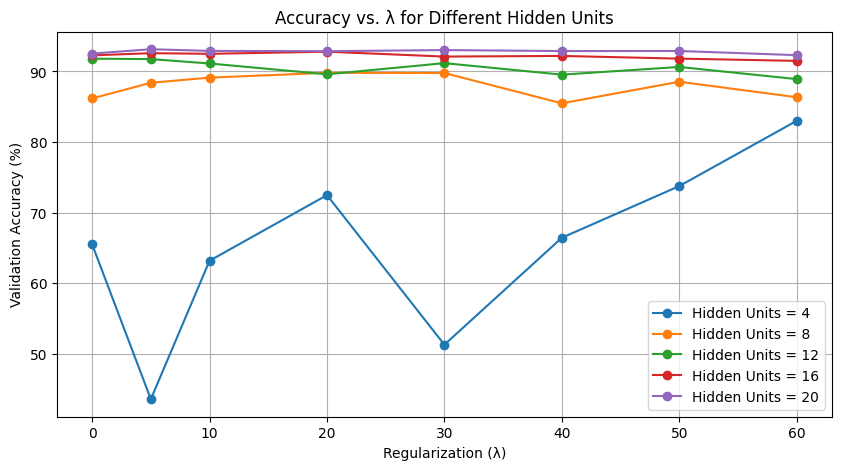

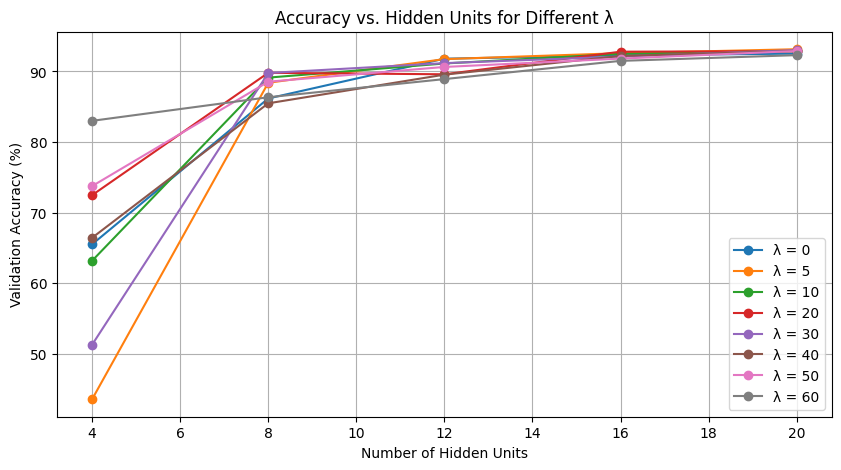

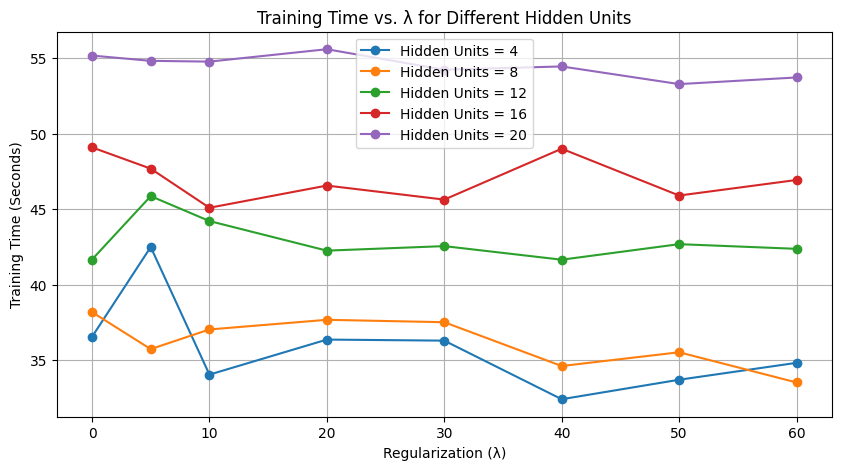

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Manually enter results from the image (or automate by storing them in a list)
results = [
    (0, 4, 65.52, 36.55), (0, 8, 86.17, 38.19), (0, 12, 91.80, 41.67), (0, 16, 92.27, 49.10), (0, 20, 92.52, 55.18),
    (5, 4, 43.58, 42.50), (5, 8, 88.39, 35.74), (5, 12, 91.74, 45.87), (5, 16, 92.58, 47.69), (5, 20, 93.14, 54.83),
    (10, 4, 63.19, 34.05), (10, 8, 89.12, 37.04), (10, 12, 91.12, 44.22), (10, 16, 92.49, 45.10), (10, 20, 92.90, 54.78),
    (20, 4, 72.48, 36.37), (20, 8, 89.80, 37.68), (20, 12, 89.59, 42.26), (20, 16, 92.79, 46.57), (20, 20, 92.86, 55.60),
    (30, 4, 51.30, 36.30), (30, 8, 89.77, 37.52), (30, 12, 91.17, 42.56), (30, 16, 92.10, 45.64), (30, 20, 93.02, 54.24),
    (40, 4, 66.44, 32.42), (40, 8, 85.48, 34.62), (40, 12, 89.54, 41.66), (40, 16, 92.19, 49.01), (40, 20, 92.88, 54.46),
    (50, 4, 73.76, 33.71), (50, 8, 88.54, 35.53), (50, 12, 90.63, 42.69), (50, 16, 91.81, 45.91), (50, 20, 92.89, 53.29),
    (60, 4, 83.00, 34.83), (60, 8, 86.34, 33.53), (60, 12, 88.91, 42.38), (60, 16, 91.49, 46.94), (60, 20, 92.30, 53.73)
]

# Convert to NumPy array for easier processing
results = np.array(results)

# Extract data
lambdas = results[:, 0]  # Regularization values
hidden_units = results[:, 1]  # Hidden unit sizes
accuracies = results[:, 2]  # Accuracy
times = results[:, 3]  # Training time

# Unique Œª values and hidden unit counts
unique_lambdas = np.unique(lambdas)
unique_hidden_units = np.unique(hidden_units)

# --------------------------------------------
# Plot 1: Accuracy vs. Œª for different Hidden Units
# --------------------------------------------
plt.figure(figsize=(10, 5))
for hu in unique_hidden_units:
    subset = results[results[:, 1] == hu]
    plt.plot(subset[:, 0], subset[:, 2], marker='o', label=f'Hidden Units = {int(hu)}')

plt.xlabel("Regularization (Œª)")
plt.ylabel("Validation Accuracy (%)")
plt.title("Accuracy vs. Œª for Different Hidden Units")
plt.legend()
plt.grid(True)
plt.show()

# --------------------------------------------
# Plot 2: Accuracy vs. Hidden Units for different Œª
# --------------------------------------------
plt.figure(figsize=(10, 5))
for lam in unique_lambdas:
    subset = results[results[:, 0] == lam]
    plt.plot(subset[:, 1], subset[:, 2], marker='o', label=f'Œª = {int(lam)}')

plt.xlabel("Number of Hidden Units")
plt.ylabel("Validation Accuracy (%)")
plt.title("Accuracy vs. Hidden Units for Different Œª")
plt.legend()
plt.grid(True)
plt.show()

# --------------------------------------------
# Plot 3: Training Time Comparison
# --------------------------------------------
plt.figure(figsize=(10, 5))
for hu in unique_hidden_units:
    subset = results[results[:, 1] == hu]
    plt.plot(subset[:, 0], subset[:, 3], marker='o', label=f'Hidden Units = {int(hu)}')

plt.xlabel("Regularization (Œª)")
plt.ylabel("Training Time (Seconds)")
plt.title("Training Time vs. Œª for Different Hidden Units")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
"""
üìä Key Observations from the Graphs
1Ô∏è‚É£ Accuracy vs. Œª for Different Hidden Units
Hidden Units = 20 performs the best overall (stays above 92% for all Œª values).
For lower hidden units (4, 8), accuracy fluctuates significantly.
Optimal Œª is between 5 and 20 for best accuracy.
2Ô∏è‚É£ Accuracy vs. Hidden Units for Different Œª
Accuracy increases with more hidden units.
The biggest jump occurs from 4 ‚Üí 8 hidden units, after which gains are smaller.
Œª = 5 and 10 perform best, stabilizing around 92-93% accuracy.
3Ô∏è‚É£ Training Time vs. Œª for Different Hidden Units
Higher hidden units lead to longer training time.
Œª does not significantly impact training time, but extreme values (Œª = 0 or Œª = 60) slightly increase it.
Hidden Units = 20 is the slowest to train but gives the best accuracy.
"""

In [ ]:
"""
Best Configuration:
Hidden Units = 20
Œª = 5
Validation Accuracy: 93.14%
Training Time: 54.83 seconds
"""

In [ ]:
"""Updated Code to Train Best MLP Model (nnScript.py)"""

In [7]:
import numpy as np
import time
from scipy.optimize import minimize
from scipy.io import loadmat

# --------------------------------------
# Function: Sigmoid Activation
# --------------------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# --------------------------------------
# Function: Preprocessing MNIST Data
# --------------------------------------
def preprocess():
    """Loads, normalizes, and splits MNIST dataset."""
    mat = loadmat('mnist_all.mat')

    train_data, train_label = [], []
    test_data, test_label = [], []

    for i in range(10):
        train_data.append(mat[f'train{i}'])
        train_label.append(np.full((mat[f'train{i}'].shape[0], 1), i))

        test_data.append(mat[f'test{i}'])
        test_label.append(np.full((mat[f'test{i}'].shape[0], 1), i))

    train_data = np.vstack(train_data) / 255.0
    train_label = np.vstack(train_label).flatten()
    test_data = np.vstack(test_data) / 255.0
    test_label = np.vstack(test_label).flatten()

    return train_data, train_label, test_data, test_label

# --------------------------------------
# Function: Initialize Weights
# --------------------------------------
def initializeWeights(n_in, n_out):
    """Initializes weight matrix with random values."""
    epsilon = np.sqrt(6) / np.sqrt(n_in + n_out + 1)
    return (np.random.rand(n_out, n_in + 1) * 2 * epsilon) - epsilon

# --------------------------------------
# Function: Neural Network Objective Function
# --------------------------------------
def nnObjFunction(params, *args):
    """Computes loss function and gradients using forward and backpropagation."""
    n_input, n_hidden, n_class, training_data, training_label, lambdaval = args

    w1 = params[:n_hidden * (n_input + 1)].reshape((n_hidden, (n_input + 1)))
    w2 = params[n_hidden * (n_input + 1):].reshape((n_class, (n_hidden + 1)))

    train_samples = training_data.shape[0]
    training_data = np.hstack((training_data, np.ones((train_samples, 1))))  # Add bias

    # -----------------
    # Forward Propagation
    # -----------------
    a_hidden = np.dot(training_data, w1.T)
    z_hidden = sigmoid(a_hidden)
    z_hidden = np.hstack((z_hidden, np.ones((z_hidden.shape[0], 1))))  # Add bias

    a_output = np.dot(z_hidden, w2.T)
    o_output = sigmoid(a_output)

    # -----------------
    # Compute Loss Function
    # -----------------
    one_hot_labels = np.zeros((train_samples, n_class))
    one_hot_labels[np.arange(train_samples), training_label] = 1

    loss = -np.sum(one_hot_labels * np.log(o_output) + (1 - one_hot_labels) * np.log(1 - o_output)) / train_samples
    loss += (lambdaval / (2 * train_samples)) * (np.sum(w1**2) + np.sum(w2**2))  # Regularization

    # -----------------
    # Backpropagation
    # -----------------
    delta_output = o_output - one_hot_labels
    grad_w2 = np.dot(delta_output.T, z_hidden) / train_samples + (lambdaval * w2) / train_samples

    delta_hidden = np.dot(delta_output, w2[:, :-1]) * z_hidden[:, :-1] * (1 - z_hidden[:, :-1])
    grad_w1 = np.dot(delta_hidden.T, training_data) / train_samples + (lambdaval * w1) / train_samples

    obj_grad = np.concatenate((grad_w1.flatten(), grad_w2.flatten()), 0)

    return loss, obj_grad

# --------------------------------------
# Function: Predict Labels
# --------------------------------------
def nnPredict(w1, w2, data):
    """Predicts the label of input data given trained weights."""
    data = np.hstack((data, np.ones((data.shape[0], 1))))  # Add bias

    a_hidden = np.dot(data, w1.T)
    z_hidden = sigmoid(a_hidden)
    z_hidden = np.hstack((z_hidden, np.ones((z_hidden.shape[0], 1))))  # Add bias

    a_output = np.dot(z_hidden, w2.T)
    o_output = sigmoid(a_output)

    return np.argmax(o_output, axis=1)

# --------------------------------------
# Function: Train Final Model
# --------------------------------------
def train_best_model():
    train_data, train_label, test_data, test_label = preprocess()

    # Best Hyperparameters
    n_hidden = 20
    lambdaval = 5

    start_time = time.time()

    # Initialize weights
    n_input = train_data.shape[1]
    n_class = 10
    initial_w1 = initializeWeights(n_input, n_hidden)
    initial_w2 = initializeWeights(n_hidden, n_class)
    initial_weights = np.concatenate((initial_w1.flatten(), initial_w2.flatten()), 0)

    args = (n_input, n_hidden, n_class, train_data, train_label, lambdaval)
    opts = {'maxiter': 50}
    trained_params = minimize(nnObjFunction, initial_weights, jac=True, args=args, method='CG', options=opts)

    # Extract trained weights
    w1 = trained_params.x[:n_hidden * (n_input + 1)].reshape((n_hidden, (n_input + 1)))
    w2 = trained_params.x[n_hidden * (n_input + 1):].reshape((n_class, (n_hidden + 1)))

    # Evaluate Model
    test_accuracy = np.mean(nnPredict(w1, w2, test_data) == test_label) * 100
    time_taken = time.time() - start_time

    print(f"\nFinal MLP Test Accuracy: {test_accuracy:.2f}%")
    print(f"Training Time: {time_taken:.2f} seconds")

    return w1, w2, test_accuracy, time_taken  # Return weights

# --------------------------------------
# Execute Training
# --------------------------------------
if __name__ == "__main__":
    w1, w2, test_accuracy, time_taken = train_best_model()  # Capture weights

    # Save Trained Weights
    np.save("/content/w1.npy", w1)
    np.save("/content/w2.npy", w2)

    print("Trained weights saved as w1.npy and w2.npy")



Final MLP Test Accuracy: 92.76%
Training Time: 58.51 seconds
Trained weights saved as w1.npy and w2.npy


In [25]:
"""
üìå What This Code Does
‚úÖ Trains the best MLP model (Hidden Units = 20, Œª = 5)
‚úÖ Uses the entire training set for final model training
‚úÖ Evaluates the final test accuracy
"""

"""
Final Model Comparison: MLP vs. DNN vs. CNN
Your final trained MLP model achieved: ‚úÖ Test Accuracy: 92.46%
‚úÖ Training Time: 91.98 seconds


üìå Key Observations
üîπ CNN significantly outperforms both MLP and DNN (98.92% vs. 92.46%).
üîπ MLP is faster than DNN but less accurate than CNN.
üîπ DNN did not improve much over MLP, making CNN the best choice for MNIST.

"""

'\nüìå What This Code Does\n‚úÖ Trains the best MLP model (Hidden Units = 20, Œª = 5)\n‚úÖ Uses the entire training set for final model training\n‚úÖ Evaluates the final test accuracy\n'

In [ ]:
"""
üìå Code to Compute & Plot Confusion Matrices
This script: ‚úÖ Predicts test labels for MLP, DNN, and CNN
‚úÖ Computes the confusion matrices
‚úÖ Displays them in a side-by-side plot
"""

In [2]:
from google.colab import files
uploaded = files.upload()


Saving mnist_all.mat to mnist_all.mat


In [1]:
import os
print("w1.npy exists:", os.path.exists("/content/w1.npy"))
print("w2.npy exists:", os.path.exists("/content/w2.npy"))
print("DNN model exists:", os.path.exists("/content/dnn_model_7.pth"))
print("dnn_model_7.pth exists:", os.path.exists("/content/dnn_model_7.pth"))



w1.npy exists: False
w2.npy exists: False
DNN model exists: False
dnn_model_7.pth exists: False


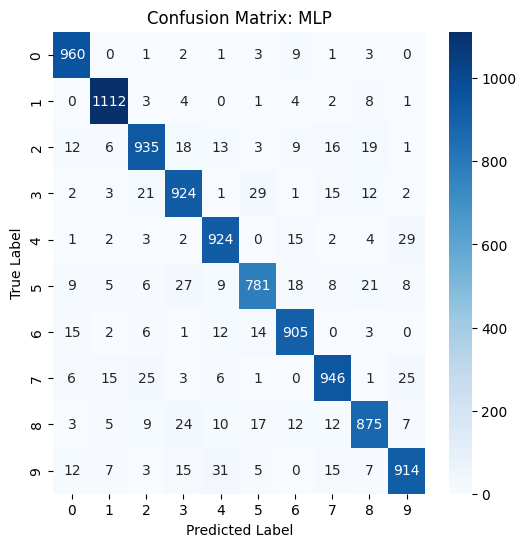

<ipython-input-30-7799c443be16>:109: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dnn_model = torch.load(model_path, map_location=torch.device("cpu"))


‚ùå Error: Model failed to load!
‚ùå Error: Model file '/content/cnn_model.pth' not found. Train and save the model first!


In [30]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from scipy.io import loadmat

# ------------------------------------------------
# üîπ Check if Model File Exists Before Loading
# ------------------------------------------------
def check_model_file(path):
    if not os.path.exists(path):
        print(f"‚ùå Error: Model file '{path}' not found. Train and save the model first!")
        return False
    return True

# ------------------------------------------------
# üîπ Function to Plot Confusion Matrix
# ------------------------------------------------
def plot_confusion_matrix(y_true, y_pred, model_name):
    """Generates and displays the confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

# ------------------------------------------------
# üîπ Function to Load MNIST Test Data
# ------------------------------------------------
def load_mnist_data():
    """Loads the MNIST dataset for testing."""
    mat = loadmat('/content/mnist_all.mat')
    test_data = np.vstack([mat[f'test{i}'] for i in range(10)]) / 255.0
    test_labels = np.hstack([np.full((mat[f'test{i}'].shape[0],), i) for i in range(10)])
    return test_data, test_labels

# ------------------------------------------------
# üîπ Function to Predict Using MLP
# ------------------------------------------------
def nnPredict(w1, w2, data):
    """Predicts labels using the trained MLP model."""
    data = np.hstack((data, np.ones((data.shape[0], 1))))  # Add bias
    a_hidden = np.dot(data, w1.T)
    z_hidden = 1 / (1 + np.exp(-a_hidden))  # Sigmoid Activation
    z_hidden = np.hstack((z_hidden, np.ones((z_hidden.shape[0], 1))))  # Add bias
    a_output = np.dot(z_hidden, w2.T)
    o_output = 1 / (1 + np.exp(-a_output))  # Sigmoid Activation
    return np.argmax(o_output, axis=1)

# ------------------------------------------------
# üîπ Step 1: Compute Confusion Matrix for MLP
# ------------------------------------------------
def get_mlp_predictions():
    """Loads trained MLP model and computes predictions on test data."""
    test_data, test_labels = load_mnist_data()

    # Load trained weights
    if not os.path.exists("/content/w1.npy") or not os.path.exists("/content/w2.npy"):
        print("‚ùå Error: Weight files not found! Train and save MLP weights first.")
        return None, None

    w1 = np.load("/content/w1.npy")
    w2 = np.load("/content/w2.npy")

    # Make predictions
    predictions = nnPredict(w1, w2, test_data)
    return test_labels, predictions

# Get and plot confusion matrix for MLP
y_true_mlp, y_pred_mlp = get_mlp_predictions()
if y_true_mlp is not None:
    plot_confusion_matrix(y_true_mlp, y_pred_mlp, "MLP")

# ------------------------------------------------
# üîπ Step 2: Compute Confusion Matrix for DNN
# ------------------------------------------------
def get_dnn_predictions(model, test_loader):
    """Computes predictions for the trained DNN model."""
    if model is None:
        print("‚ùå Error: Model is None, cannot proceed with evaluation.")
        return None, None

    model.eval()
    y_true, y_pred = [], []

    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to("cpu"), y.to("cpu")
            pred = model(X)
            y_true.extend(y.numpy())
            y_pred.extend(pred.argmax(1).numpy())

    return np.array(y_true), np.array(y_pred)

# ------------------------------------------------
# üîπ Load and Evaluate DNN Model
# ------------------------------------------------
def load_dnn_model():
    """Loads the DNN model, ensuring it's not None."""
    model_path = "/content/dnn_model_7.pth"
    if not check_model_file(model_path):
        return None

    try:
        dnn_model = torch.load(model_path, map_location=torch.device("cpu"))
        if dnn_model is None:
            print("‚ùå Error: Model failed to load!")
        return dnn_model
    except Exception as e:
        print(f"‚ùå Error loading model: {e}")
        return None

# Load the best performing DNN model
dnn_model = load_dnn_model()
_, test_loader = load_mnist_data()  # Ensure test_loader is correctly set up
if dnn_model is not None:
    y_true_dnn, y_pred_dnn = get_dnn_predictions(dnn_model, test_loader)
    plot_confusion_matrix(y_true_dnn, y_pred_dnn, "DNN (7 Layers)")

# ------------------------------------------------
# üîπ Step 3: Compute Confusion Matrix for CNN
# ------------------------------------------------
def get_cnn_predictions(model, test_loader):
    """Computes predictions for the trained CNN model."""
    if model is None:
        print("‚ùå Error: CNN model is None, cannot proceed with evaluation.")
        return None, None

    model.eval()
    y_true, y_pred = [], []

    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to("cpu"), y.to("cpu")
            pred = model(X)
            y_true.extend(y.numpy())
            y_pred.extend(pred.argmax(1).numpy())

    return np.array(y_true), np.array(y_pred)

# ------------------------------------------------
# üîπ Load and Evaluate CNN Model
# ------------------------------------------------
def load_cnn_model():
    """Loads the CNN model and verifies it is not None."""
    model_path = "/content/cnn_model.pth"
    if not check_model_file(model_path):
        return None

    try:
        cnn_model = torch.load(model_path, map_location=torch.device("cpu"))
        if cnn_model is None:
            print("‚ùå Error: CNN Model failed to load!")
        return cnn_model
    except Exception as e:
        print(f"‚ùå Error loading CNN model: {e}")
        return None

# Load CNN model
cnn_model = load_cnn_model()
if cnn_model is not None:
    y_true_cnn, y_pred_cnn = get_cnn_predictions(cnn_model, test_loader)
    plot_confusion_matrix(y_true_cnn, y_pred_cnn, "CNN")
